In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay


In [7]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [8]:

# Combine train and test data to split again
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)


In [9]:

# Split into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.25, random_state=42)


In [10]:

# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))


In [11]:

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training data
knn.fit(x_train_flat, y_train.ravel())

# Predict on the training set
y_train_pred = knn.predict(x_train_flat)

# Predict on the test set
y_test_pred = knn.predict(x_test_flat)


In [12]:

# Calculate accuracy on training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.5742
Test Accuracy: 0.3293


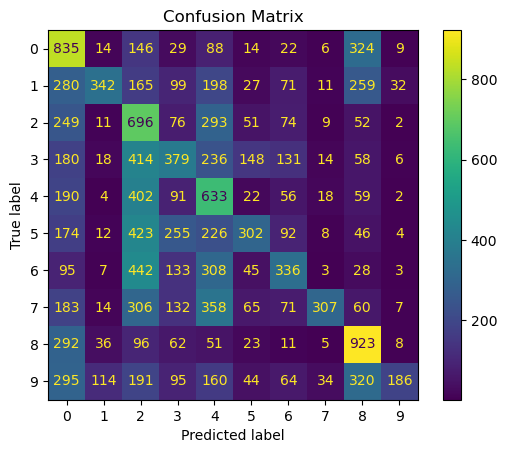

In [13]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=range(10)).plot()
plt.title("Confusion Matrix")
plt.show()


In [14]:

# Error Rate
error_rate = 1 - test_accuracy
print(f"Error Rate: {error_rate:.4f}")


Error Rate: 0.6707


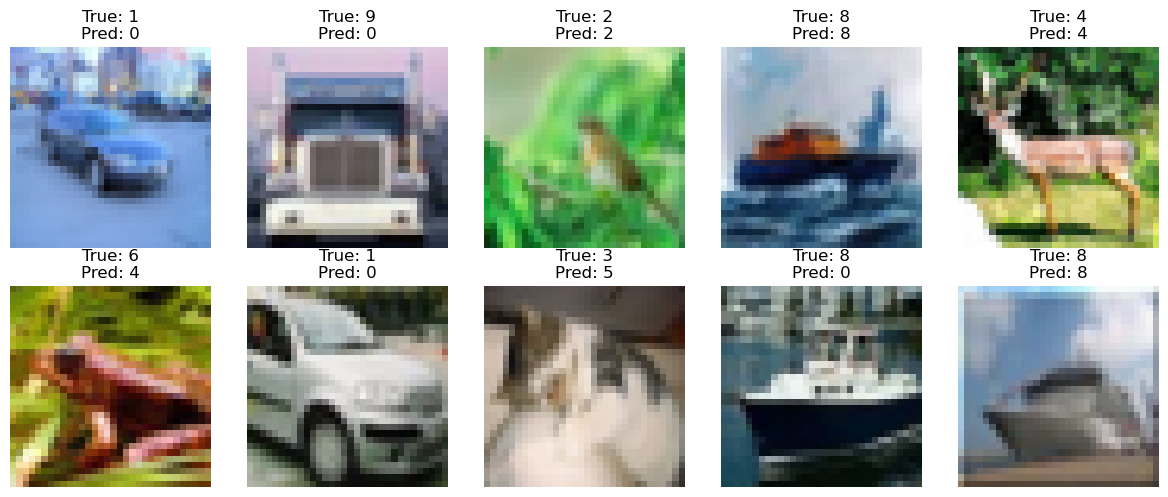

In [18]:

# Plotting Test vs Prediction
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"True: {y_test[i][0]}\nPred: {y_test_pred[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()


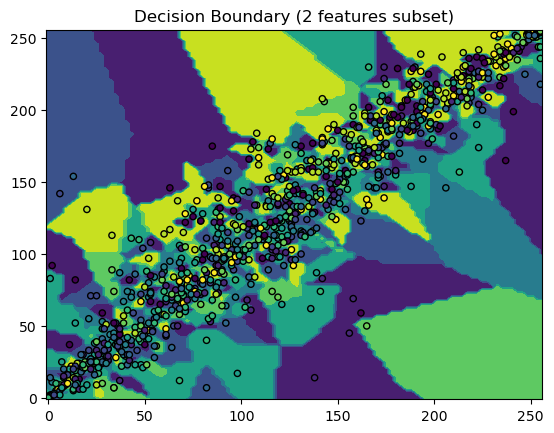

In [22]:

# # Decision Boundary Plot (for a small subset of data due to high dimensionality)
# sample_size = 1000
# x_train_sample = x_train_flat[:sample_size, :2]  # Taking first 2 features for simplicity
# y_train_sample = y_train[:sample_size]

# knn_sample = KNeighborsClassifier(n_neighbors=1)
# knn_sample.fit(x_train_sample, y_train_sample.ravel())

# DecisionBoundaryDisplay.from_estimator(knn_sample, x_train_sample, response_method="predict")
# plt.scatter(x_train_sample[:, 0], x_train_sample[:, 1], c=y_train_sample.ravel(), edgecolor='k', s=20)
# plt.title("Decision Boundary (2 features subset)")
# plt.show()


k=1 Train Accuracy: 1.0000 Test Accuracy: 0.3477
k=1 Train Error Rate: 0.0000 Test Error Rate: 0.6523
k=2 Train Accuracy: 0.6303 Test Accuracy: 0.3094
k=2 Train Error Rate: 0.3697 Test Error Rate: 0.6906
k=5 Train Accuracy: 0.5001 Test Accuracy: 0.3315
k=5 Train Error Rate: 0.4999 Test Error Rate: 0.6685
k=10 Train Accuracy: 0.4283 Test Accuracy: 0.3273
k=10 Train Error Rate: 0.5717 Test Error Rate: 0.6727
k=50 Train Accuracy: 0.3347 Test Accuracy: 0.3089
k=50 Train Error Rate: 0.6653 Test Error Rate: 0.6911
k=100 Train Accuracy: 0.3113 Test Accuracy: 0.2991
k=100 Train Error Rate: 0.6887 Test Error Rate: 0.7009
k=110 Train Accuracy: 0.3088 Test Accuracy: 0.2984
k=110 Train Error Rate: 0.6912 Test Error Rate: 0.7016


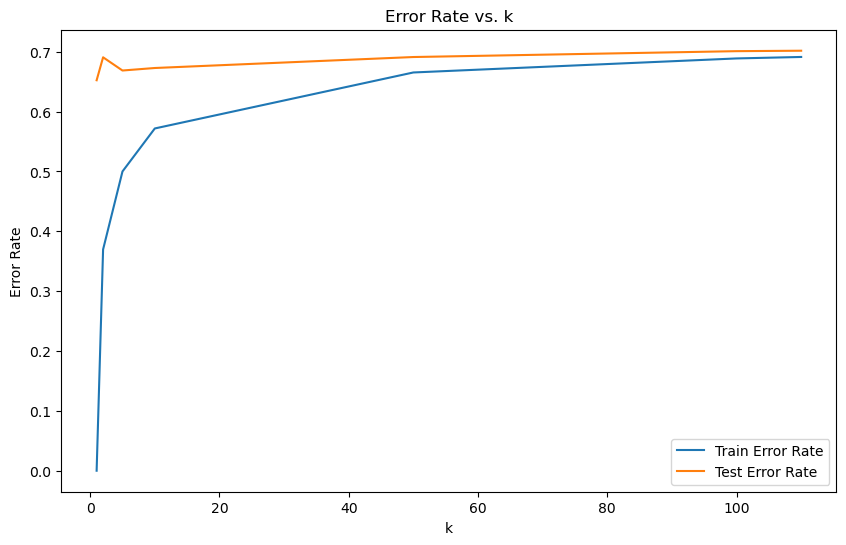

In [21]:
k_values = [1, 2, 5, 10, 50, 100, 110]
train_error_rates = []
test_error_rates = []

# Loop through each k value
for k in k_values:
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier on the training data
    knn.fit(x_train_flat, y_train.ravel())

    # Predict on the training set
    y_train_pred = knn.predict(x_train_flat)
    # Predict on the test set
    y_test_pred = knn.predict(x_test_flat)

    # Calculate accuracy on the training and test set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_error_rate = 1 - train_accuracy
    test_error_rate = 1 - test_accuracy
    train_error_rates.append(train_error_rate)
    test_error_rates.append(test_error_rate)

    # Print results for this k
    print(f"k={k} Train Accuracy: {train_accuracy:.4f} Test Accuracy: {test_accuracy:.4f}")
    print(f"k={k} Train Error Rate: {train_error_rate:.4f} Test Error Rate: {test_error_rate:.4f}")


# Plotting Error Rates vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_error_rates, label='Train Error Rate')
plt.plot(k_values, test_error_rates, label='Test Error Rate')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k')
plt.legend()
plt.show()

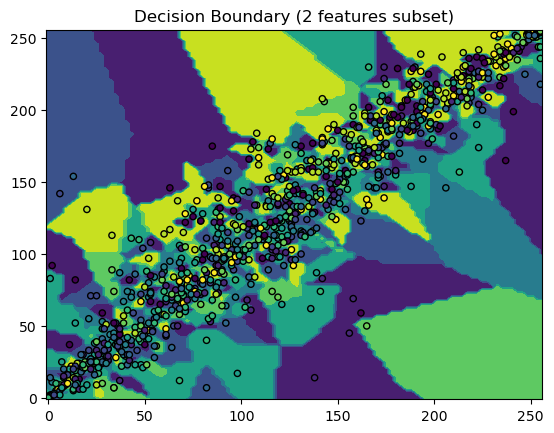

In [23]:
# Decision Boundary Plot (for a small subset of data due to high dimensionality)
sample_size = 1000
x_train_sample = x_train_flat[:sample_size, :2]  # Taking first 2 features for simplicity
y_train_sample = y_train[:sample_size]

knn_sample = KNeighborsClassifier(n_neighbors=1)
knn_sample.fit(x_train_sample, y_train_sample.ravel())

DecisionBoundaryDisplay.from_estimator(knn_sample, x_train_sample, response_method="predict")
plt.scatter(x_train_sample[:, 0], x_train_sample[:, 1], c=y_train_sample.ravel(), edgecolor='k', s=20)
plt.title("Decision Boundary (2 features subset)")
plt.show()


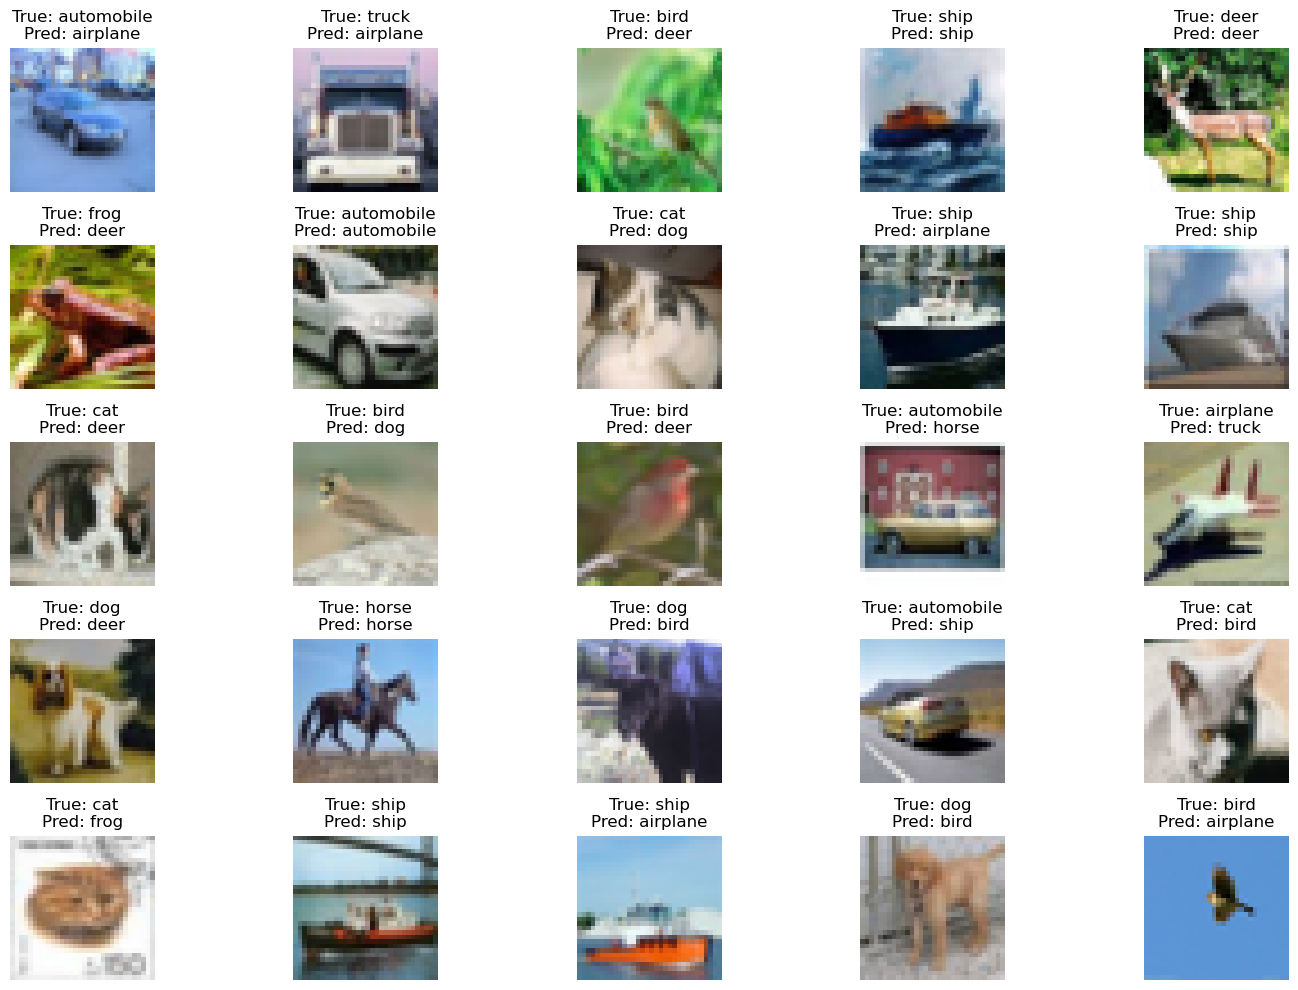

In [25]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

knn_best_k = KNeighborsClassifier(n_neighbors=1)
knn_best_k.fit(x_train_flat, y_train.ravel())
# Predict on the training set
y_train_pred = knn_best_k.predict(x_train_flat)
# Predict on the test set
y_test_pred = knn_best_k.predict(x_test_flat)
fig, axes = plt.subplots(5, 5, figsize=(15, 10))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(x_test[i])
    true_label = class_names[y_test[i][0]]
    pred_label = class_names[y_test_pred[i]]
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()